# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [2]:
df = pd.read_pickle(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Data\Prepared Data\grouped data.pkl')

In [3]:
#check data
df.head()

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,has_prior_orders,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_prices,spending_flag,median_days_since_prior_order,frequency_flag
0,1,2539329,1,2,8,NaN,False,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,1,2539329,1,2,8,NaN,False,14084,2,0,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,1,2539329,1,2,8,NaN,False,12427,3,0,...,Low-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,1,2539329,1,2,8,NaN,False,26088,4,0,...,Low-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,1,2539329,1,2,8,NaN,False,26405,5,0,...,Low-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [4]:
df.shape

(32435059, 25)

# 03. Visualizations

<AxesSubplot:>

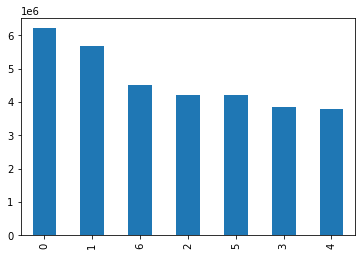

In [7]:
#create bar chart
df['orders_day_of_week'].value_counts().plot.bar()

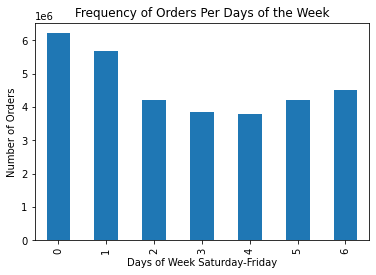

In [6]:
#sort bar chart
df['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Orders Per Days of the Week')
plt.xlabel('Days of Week Saturday-Friday')
plt.ylabel('Number of Orders')
plt.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\bar_orders_dow.png')

<AxesSubplot:>

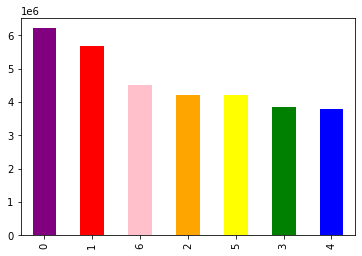

In [7]:
#add color to bar chart
df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

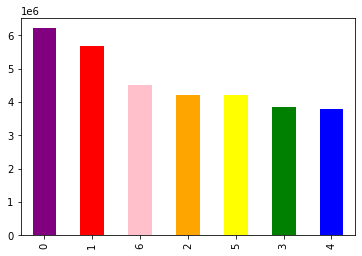

In [8]:
# save bar chart
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [12]:
# export bar chart
bar.figure.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\bar_orders_dow.png')

<AxesSubplot:ylabel='Frequency'>

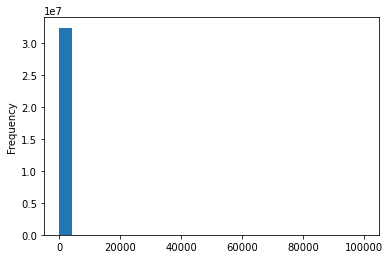

In [9]:
#create histogram
df['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

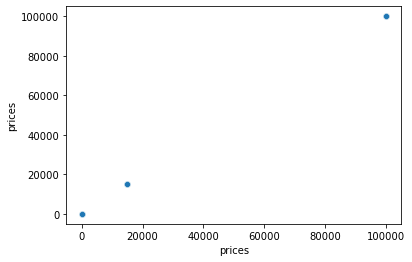

In [10]:
#create scatter plot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [11]:
#check for outliers
df.loc[df['prices'] > 100]

,user_id,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,has_prior_orders,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_prices,spending_flag,median_days_since_prior_order,frequency_flag
1576,17,912404,12,2,14,5.0,True,21553,5,0,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,17,603376,22,6,16,4.0,True,21553,3,1,...,High-range product,Regularly busy,Regularly busy,Most Orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16534,135,3264360,2,2,21,13.0,True,21553,6,0,...,High-range product,Regularly busy,Regularly busy,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16540,135,892534,3,0,8,12.0,True,21553,3,1,...,High-range product,Busiest day,Busiest days,Average Orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53712,342,229704,8,1,19,30.0,True,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average Orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32350634,205650,3172853,18,1,9,7.0,True,21553,17,1,...,High-range product,Regularly busy,Busiest days,Most Orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32377867,205818,2504315,3,5,15,3.0,True,21553,13,0,...,High-range product,Regularly busy,Regularly busy,Most Orders,25,Regular customer,170.073770,High spender,12.5,Regular customer
32377877,205818,1108388,5,4,5,1.0,True,21553,5,1,...,High-range product,Least busy,Least busy days,Fewest Orders,25,Regular customer,170.073770,High spender,12.5,Regular customer
32410707,206049,1916142,1,2,17,NaN,False,21553,2,0,...,High-range product,Regularly busy,Regularly busy,Average Orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [12]:
# turn outliers into missing values to avoid them skewing the data
df.loc[df['prices'] >100, 'prices'] = np.nan

In [13]:
df['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

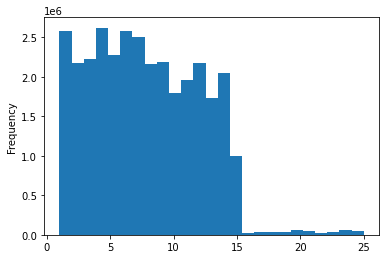

In [14]:
#fixed histogram
df['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

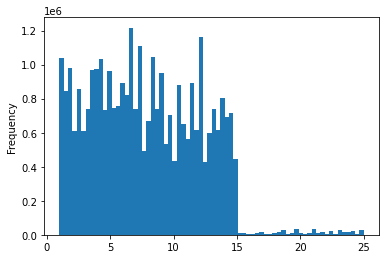

In [15]:
#increase bins to 70
df['prices'].plot.hist(bins = 70)

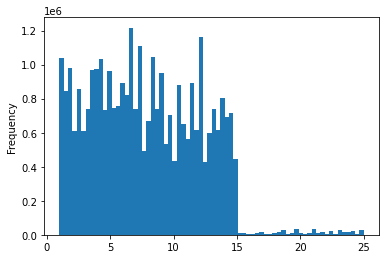

In [16]:
#save histogram
hist = df['prices'].plot.hist(bins = 70)

In [22]:
#export histogram
hist.figure.savefig(r'C:\Users\Brooke\05-2022 Instacart Basket Analysis\Analysis\Visualizations\hist_orders_dow.png')

In [23]:
#create random sample 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [24]:
#Store 70/30 sample
big = df[dev]
small = df[~dev]

In [25]:
#check sample
len(df)

32435059

In [26]:
len(big) + len(small)

32435059

In [29]:
#focus sample on specific columns
df_2 = small[['orders_day_of_week','prices']]

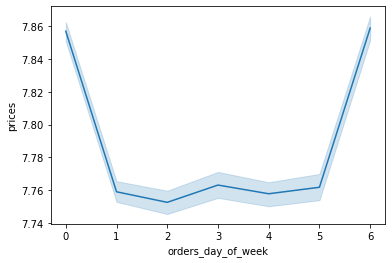

In [30]:
#create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')